<ipython-input-3-de33cf5b97b9>:25: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("air_quality_data/AirQualityUCI.csv", sep=';', decimal=',', parse_dates=[['Date', 'Time']])
<ipython-input-3-de33cf5b97b9>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("air_quality_data/AirQualityUCI.csv", sep=';', decimal=',', parse_dates=[['Date', 'Time']])


MAE: 8.987797511957186
RMSE: 14.10277548744401
R² Score: 0.8953412584710982


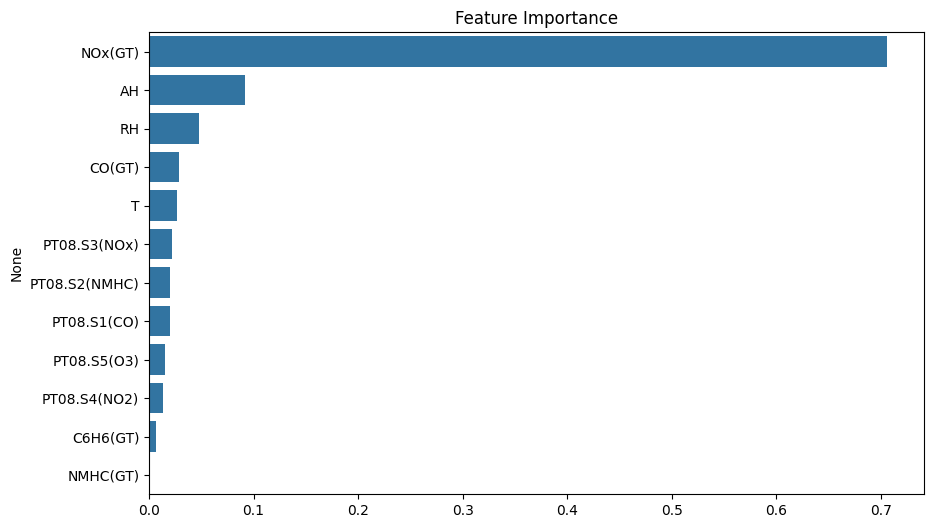

In [3]:
# 📌 STEP 1: Install and import dependencies
!pip install -q pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import zipfile
import urllib.request

# 📌 STEP 2: Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
filename = "AirQualityUCI.zip"
urllib.request.urlretrieve(url, filename)

# Unzip the file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("air_quality_data")

# Load CSV (semicolon-separated)
df = pd.read_csv("air_quality_data/AirQualityUCI.csv", sep=';', decimal=',', parse_dates=[['Date', 'Time']])
df = df.iloc[:, :-2]  # Remove last two empty columns

# 📌 STEP 3: Preprocess the data
df.replace(-200, np.nan, inplace=True)  # Replace missing values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])  # Skip datetime

# Define features and target
X = df.drop(['Date_Time', 'NO2(GT)'], axis=1)
y = df['NO2(GT)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 STEP 4: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 STEP 5: Evaluate the model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 📌 STEP 6: Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()